# Library

In [87]:
#Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Read

In [158]:
#read
df_train = pd.read_csv('Downloads/train.csv')
df_test = pd.read_csv('Downloads/test.csv')

# analysis

In [129]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   anaemia                   1000 non-null   int64  
 3   creatinine_phosphokinase  1000 non-null   int64  
 4   diabetes                  1000 non-null   int64  
 5   ejection_fraction         1000 non-null   int64  
 6   high_blood_pressure       1000 non-null   int64  
 7   platelets                 1000 non-null   float64
 8   serum_creatinine          1000 non-null   float64
 9   serum_sodium              1000 non-null   int64  
 10  sex                       1000 non-null   int64  
 11  smoking                   1000 non-null   int64  
 12  time                      1000 non-null   int64  
 13  target                    1000 non-null   int64  
dtypes: float6

In [131]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   anaemia                   1000 non-null   int64  
 3   creatinine_phosphokinase  1000 non-null   int64  
 4   diabetes                  1000 non-null   int64  
 5   ejection_fraction         1000 non-null   int64  
 6   high_blood_pressure       1000 non-null   int64  
 7   platelets                 1000 non-null   float64
 8   serum_creatinine          1000 non-null   float64
 9   serum_sodium              1000 non-null   int64  
 10  sex                       1000 non-null   int64  
 11  smoking                   1000 non-null   int64  
 12  time                      1000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 101.7 KB


In [43]:
#Describe
df_train.describe()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,999.734000,57.632000,0.41600,605.359000,0.270000,36.691000,0.237000,278330.242337,1.030258,136.841000,0.755000,0.25600,149.560000,0.198000
std,578.002214,9.875328,0.49314,971.937382,0.444182,11.037089,0.425455,79543.675235,0.704616,3.405777,0.430302,0.43664,77.381072,0.398692
min,0.000000,39.000000,0.00000,23.000000,0.000000,14.000000,0.000000,138173.134500,0.629178,116.000000,0.000000,0.00000,4.000000,0.000000
25%,496.750000,50.000000,0.00000,93.000000,0.000000,30.000000,0.000000,256629.434900,0.798218,135.000000,1.000000,0.00000,84.500000,0.000000
50%,1007.500000,58.000000,0.00000,255.000000,0.000000,35.000000,0.000000,267025.054700,0.844389,136.500000,1.000000,0.00000,185.000000,0.000000
75%,1512.250000,61.000000,1.00000,582.000000,1.000000,40.000000,0.000000,279943.418975,0.956294,139.000000,1.000000,1.00000,213.000000,0.000000
max,1998.000000,85.000000,1.00000,7861.000000,1.000000,70.000000,1.000000,824131.916700,8.994597,146.000000,1.000000,1.00000,285.000000,1.000000


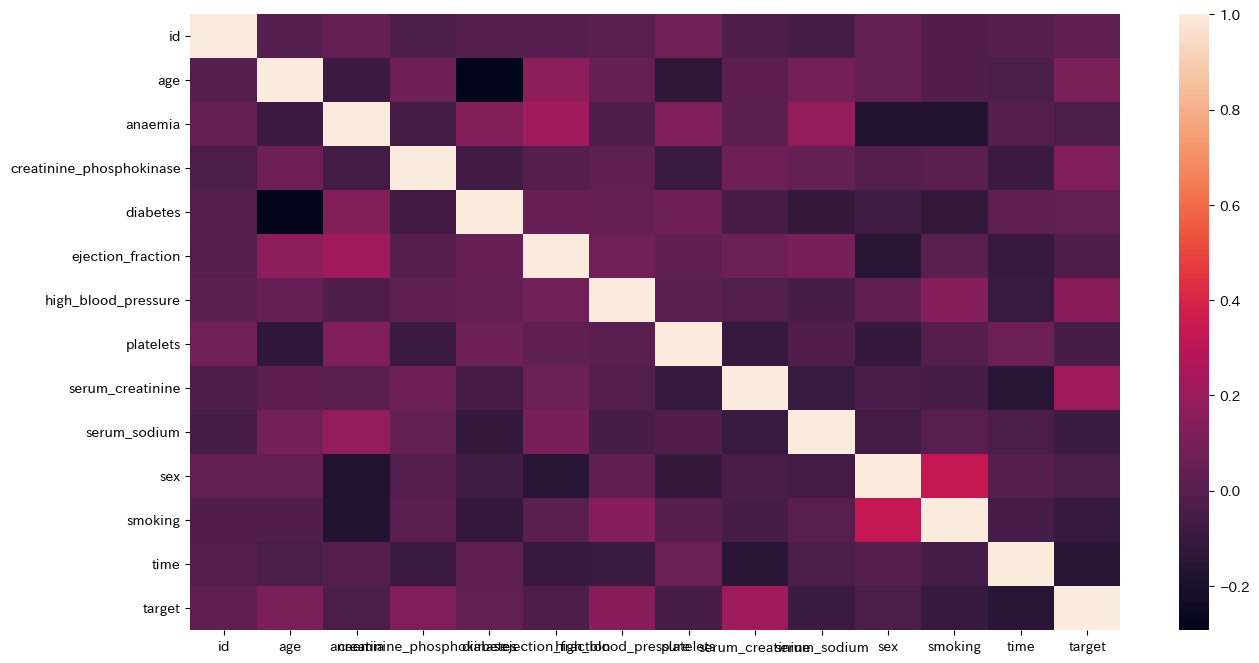

In [53]:
#Viz
plt.figure(figsize=(15, 8) )
sns.heatmap(df_train.corr() )
plt.xticks(rotation=0)
plt.show()

# Prepare

In [162]:
#target
train = df_train.drop('target', axis=1)
y = df_train['target']

display(train.head() )

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,56,1,5882,0,38,0,185315.0104,0.844417,134,1,0,10
1,3,50,0,1767,1,35,0,371620.3666,0.837448,136,0,0,187
2,7,41,0,250,1,30,0,372810.2084,0.819996,139,1,0,29
3,11,47,0,582,1,20,0,185780.6482,0.870314,137,0,0,43
4,12,60,0,80,0,25,0,265096.3999,0.828112,136,1,0,213


In [164]:
#dummy
columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
train = pd.get_dummies(train, columns=columns, drop_first=True)
test = pd.get_dummies(df_test, columns=columns, drop_first=True)

display(train.head() )

,id,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,0,56,5882,38,185315.0104,0.844417,134,10,True,False,False,True,False
1,3,50,1767,35,371620.3666,0.837448,136,187,False,True,False,False,False
2,7,41,250,30,372810.2084,0.819996,139,29,False,True,False,True,False
3,11,47,582,20,185780.6482,0.870314,137,43,False,True,False,False,False
4,12,60,80,25,265096.3999,0.828112,136,213,False,False,False,True,False


In [166]:
#scale
scaler = StandardScaler()
train_scaler = scaler.fit_transform(train)
test_scaler = scaler.transform(test)

# Model

In [168]:
#split
X_train, X_valid, y_train, y_valid = train_test_split(train_scaler, y, test_size=0.2, random_state=42, stratify=y)

In [170]:
#model
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [184]:
#train
model.fit(X_train, y_train)
model.fit(X_valid, y_valid)

#predict
train_pred = model.predict(X_train)
print('train_pred:', accuracy_score(y_train, train_pred) )
valid_pred = model.predict(X_valid)
print('valid_pred:', accuracy_score(y_valid, valid_pred) )

train_pred: 0.67
valid_pred: 0.76


# Score

In [176]:
confusion_matrix(y_train, train_pred)

array([[446, 196],
       [ 68,  90]])

In [178]:
confusion_matrix(y_valid, valid_pred)

array([[125,  35],
       [ 13,  27]])

In [194]:
#proba
train_proba = model.predict_proba(X_train)[:, 1]
valid_proba = model.predict_proba(X_valid)[:, 1]

#ROCAUC
print('train:', roc_auc_score(y_train, train_proba),
      'valid:', roc_auc_score(y_valid, valid_proba))

train: 0.6998797271185773 valid: 0.8467187500000001


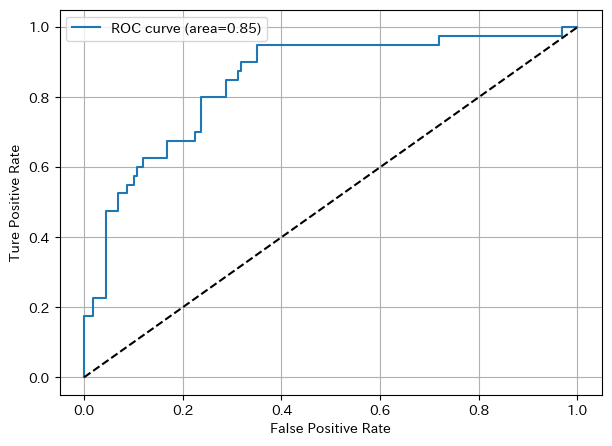

In [196]:
#AUC viz
fpr, tpr, thresholds = roc_curve(y_valid, valid_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC curve (area={roc_auc_score(y_valid, valid_proba).round(2)})")
plt.plot([0, 1.0], [0,1.0], linestyle="--", color="black")
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Predict

In [198]:
predict = model.predict_proba(test_scaler)[:, 1]

In [220]:
predict = (predict >= 0.5).astype(int)

# Submit

In [224]:
submit = pd.read_csv('Downloads/sample_submission.csv', header=None)
submit[1] = predict
submit.to_csv('Downloads/submit_20250415_1.csv', header=None, index=False)